In [ ]:
import pandas as pd
import numpy as np
# Loading the dataset
df = pd.read_csv('Life_Expectancy_Data.csv')

# Cleaning column names by stripping whitespace
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

print("Initial Data Overview")
print("\nFirst 5 rows of the dataset:")
print(df.head())



Initial Data Overview

First 5 rows of the dataset:
       Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0              263   
1  Afghanistan  2014  Developing             59.9              271   
2  Afghanistan  2013  Developing             59.9              268   
3  Afghanistan  2012  Developing             59.5              272   
4  Afghanistan  2011  Developing             59.2              275   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  ...  \
0             62     0.01               71.279624           65     1154  ...   
1             64     0.01               73.523582           62      492  ...   
2             66     0.01               73.219243           64      430  ...   
3             69     0.01               78.184215           67     2787  ...   
4             71     0.01                7.097109           68     3013  ...   

   Polio  Total_expenditure  Diphtheria  HIV/A

In [ ]:
print("\nDataFrame Info:")
print(df.info())

print("\nDescriptive Statistics for Numerical Columns (Before Cleaning):")
print(df.describe())


# Identifing missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("\nMissing Values Count and Percentage for each feature:")
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})
print(missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage (%)', ascending=False))

# Storing initial descriptive statistics for comparison later
initial_describe = df.describe()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life_expectancy                  1649 non-null   float64
 4   Adult_Mortality                  1649 non-null   int64  
 5   infant_deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage_expenditure           1649 non-null   float64
 8   Hepatitis_B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under_five_deaths                1649 non-null   int64  
 12  Pol

In [20]:
print(f"Duplicate Rows:\n{df.duplicated()}")

Duplicate Rows:
0       False
1       False
2       False
3       False
4       False
        ...  
1644    False
1645    False
1646    False
1647    False
1648    False
Length: 1649, dtype: bool


In [22]:
#Saving the cleaned data to a new csv file
df.to_csv("cleaned_life_expectancy_data.csv", index=False)
print("\nCleaned data saved to 'cleaned_life_expectancy_data.csv'")


Cleaned data saved to 'cleaned_life_expectancy_data.csv'


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset again to ensure a fresh start
new_data_set = pd.read_csv('cleaned_Life_Expectancy_data.csv')
print(new_data_set.head())



# Verifing cleaned column names
print("Cleaned Column Names after robust cleaning:")
print(new_data_set.columns.tolist())


       Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0              263   
1  Afghanistan  2014  Developing             59.9              271   
2  Afghanistan  2013  Developing             59.9              268   
3  Afghanistan  2012  Developing             59.5              272   
4  Afghanistan  2011  Developing             59.2              275   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  ...  \
0             62     0.01               71.279624           65     1154  ...   
1             64     0.01               73.523582           62      492  ...   
2             66     0.01               73.219243           64      430  ...   
3             69     0.01               78.184215           67     2787  ...   
4             71     0.01                7.097109           68     3013  ...   

   Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0      6             

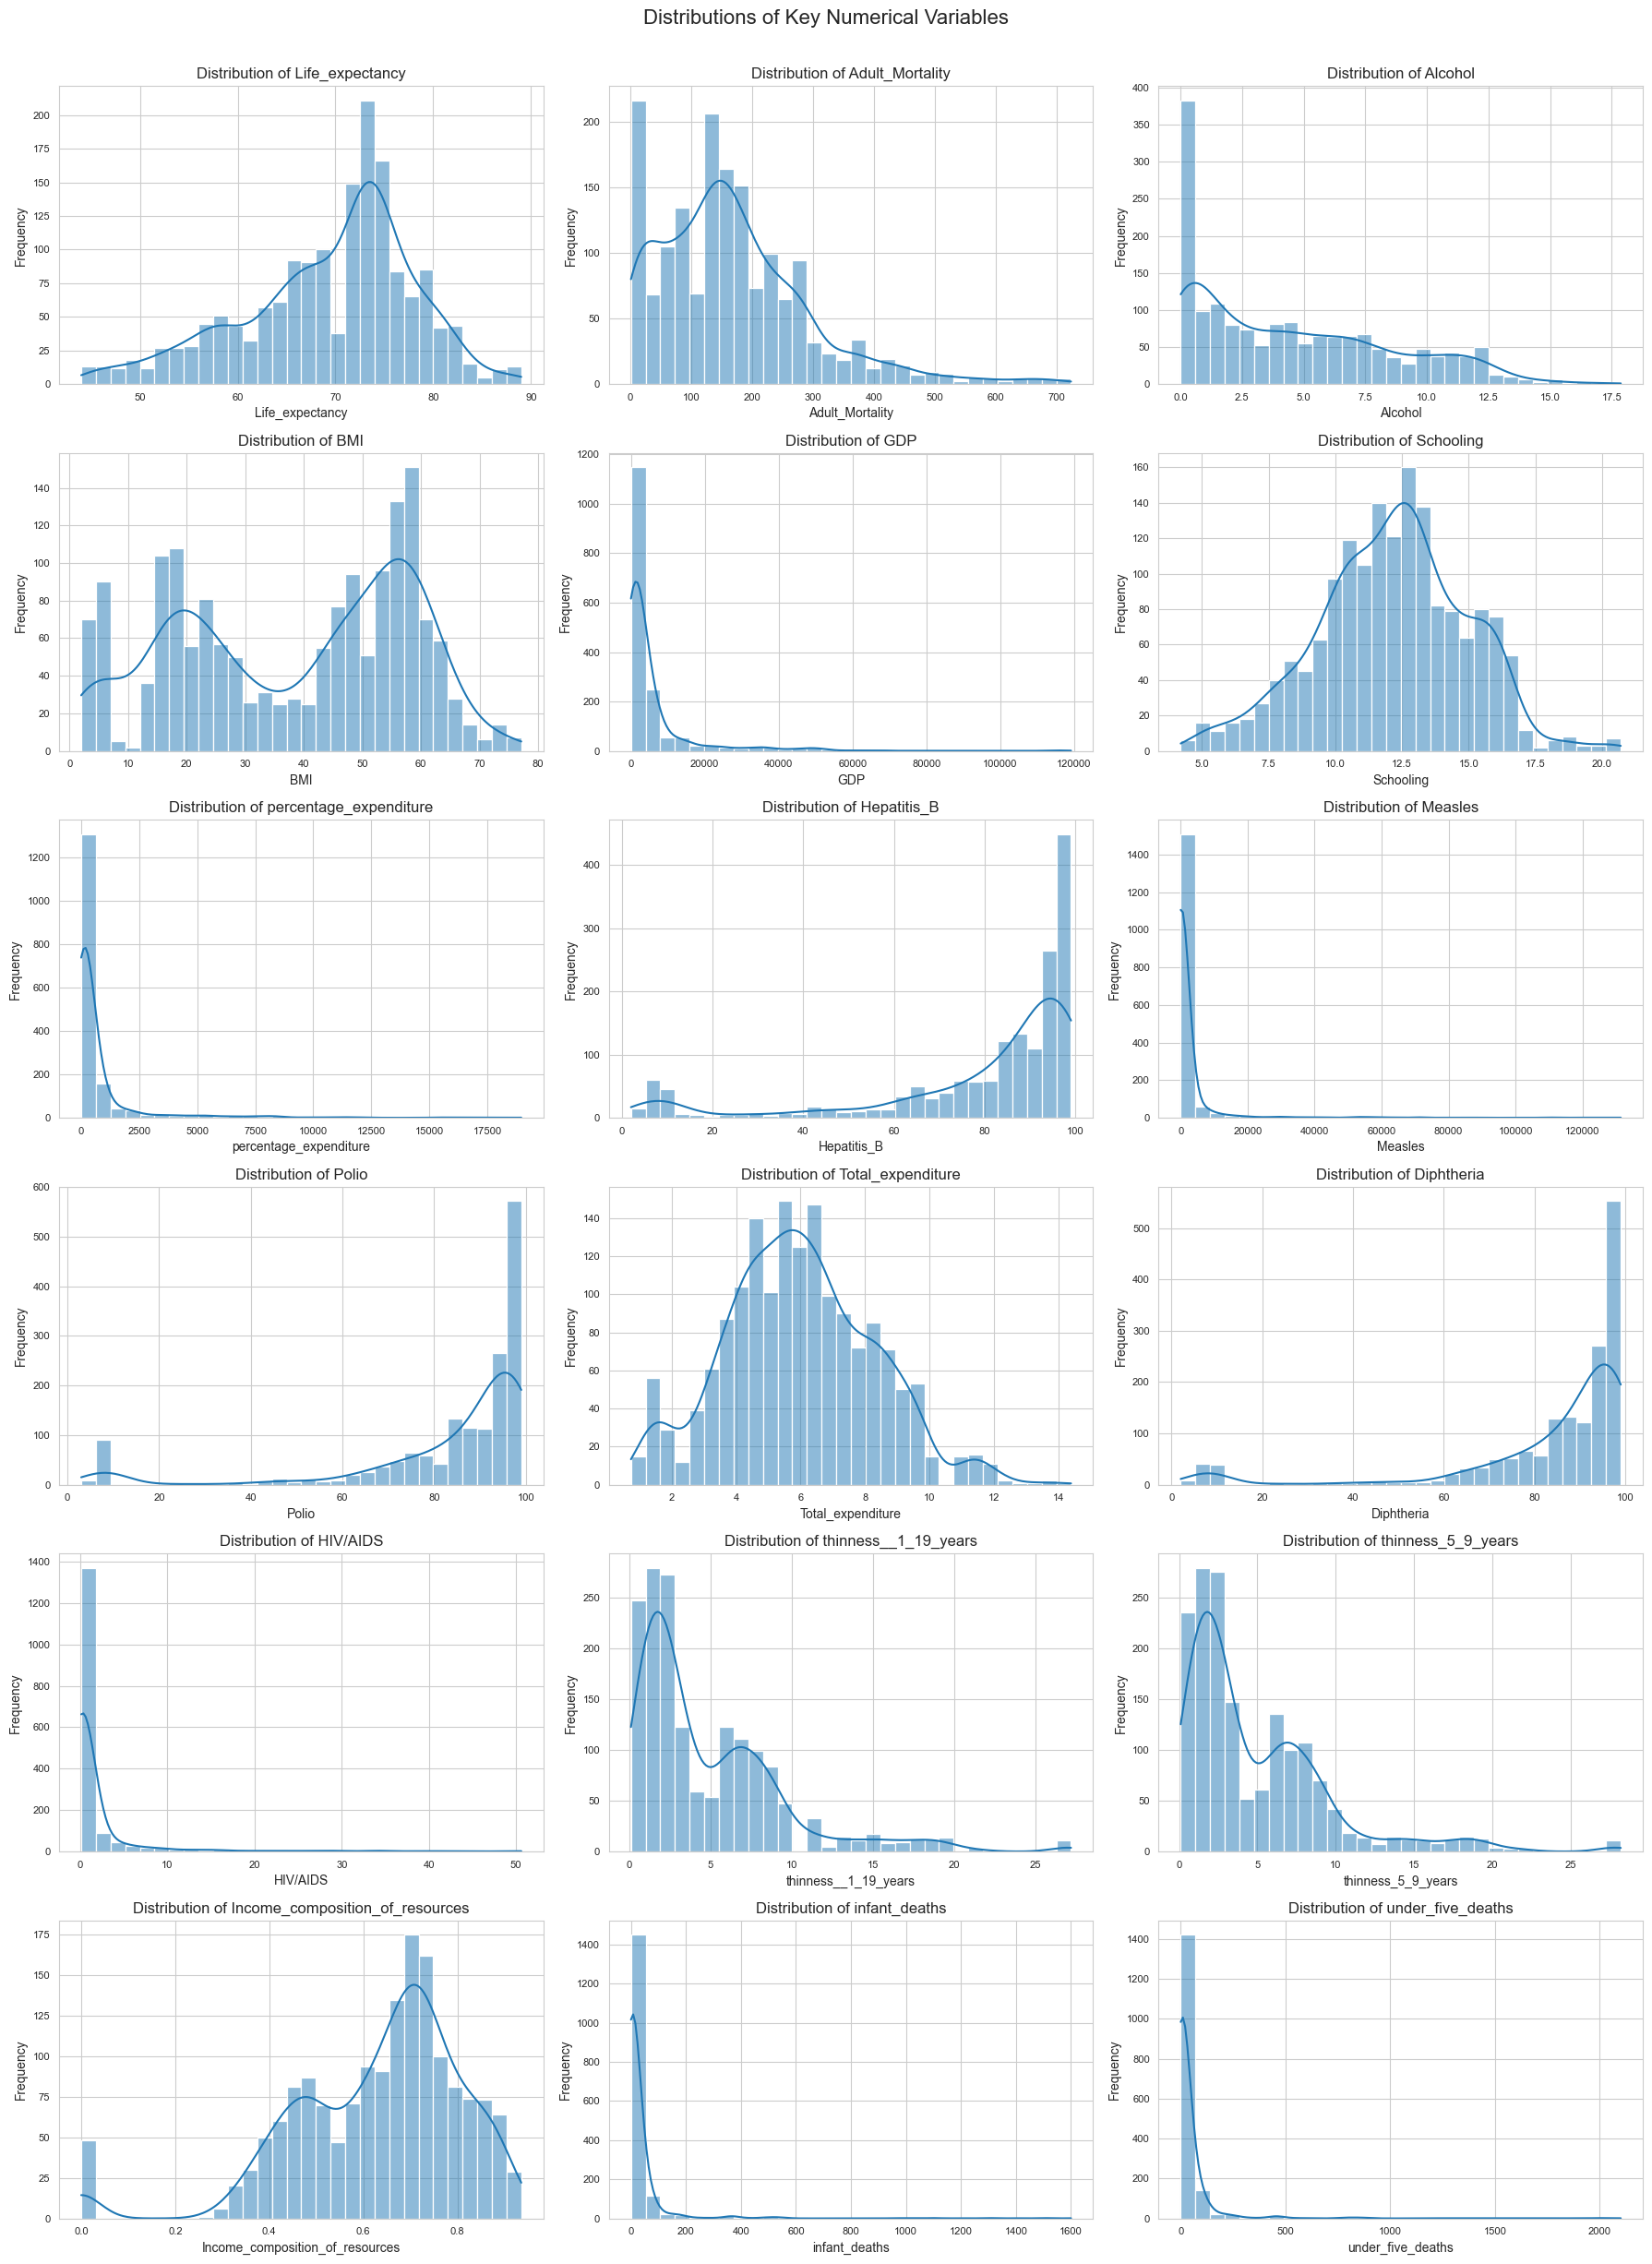

In [ ]:
# Updating the numerical_cols list based on the new, clean column names
numerical_cols = [
    'Life_expectancy', 'Adult_Mortality', 'Alcohol', 'BMI', 'GDP', 'Schooling',
    'percentage_expenditure', 'Hepatitis_B', 'Measles', 'Polio', 'Total_expenditure',
    'Diphtheria', 'HIV/AIDS',
    'thinness__1_19_years', 'thinness_5_9_years',
    'Income_composition_of_resources', 'infant_deaths', 'under_five_deaths'
]

# Setting style for plots
sns.set_style("whitegrid")

# Creating histograms for key numerical variables
# Setting up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))
axes = axes.flatten() # Flattening the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    sns.histplot(new_data_set[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Removing any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distributions of Key Numerical Variables', y=1.02, fontsize=16) # Adjusting y to prevent title overlap
plt.savefig('numerical_distributions_cleaned.png')
plt.show()

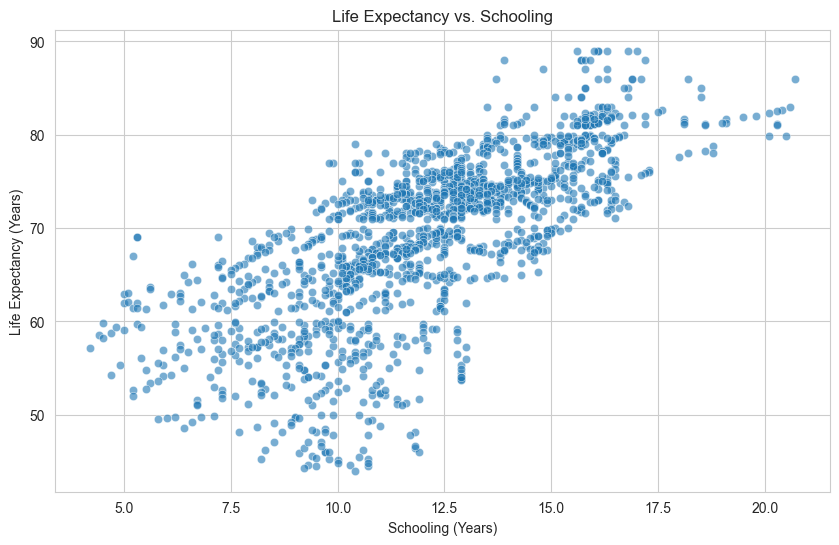

In [36]:
# Life Expectancy vs. Schooling
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Schooling', y='Life_expectancy', alpha=0.6)
plt.title('Life Expectancy vs. Schooling')
plt.xlabel('Schooling (Years)')
plt.ylabel('Life Expectancy (Years)')
plt.savefig('life_expectancy_vs_schooling.png')
plt.show()



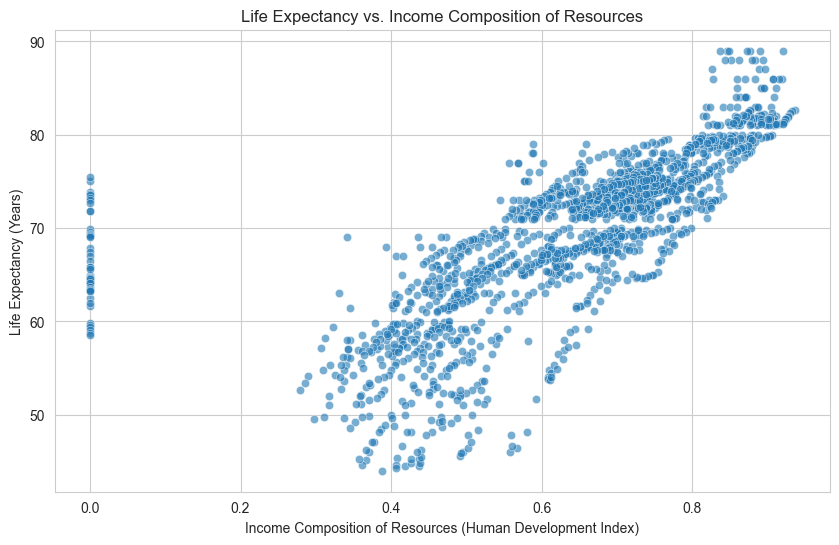

In [38]:
# Life Expectancy vs. Income composition of resources
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income_composition_of_resources', y='Life_expectancy', alpha=0.6)
plt.title('Life Expectancy vs. Income Composition of Resources')
plt.xlabel('Income Composition of Resources (Human Development Index)')
plt.ylabel('Life Expectancy (Years)')
plt.savefig('life_expectancy_vs_income_composition.png')
plt.show()



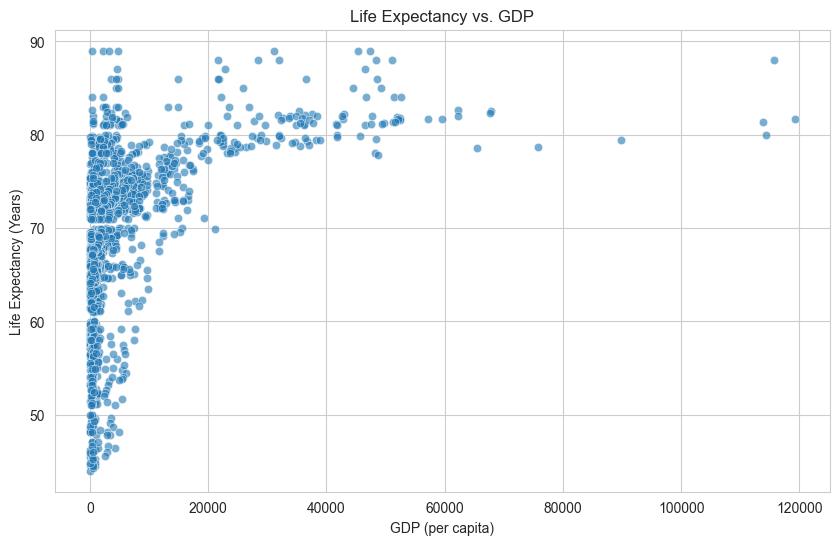

In [40]:
# Life Expectancy vs. GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP', y='Life_expectancy', alpha=0.6)
plt.title('Life Expectancy vs. GDP')
plt.xlabel('GDP (per capita)')
plt.ylabel('Life Expectancy (Years)')
plt.savefig('life_expectancy_vs_gdp.png')
plt.show()



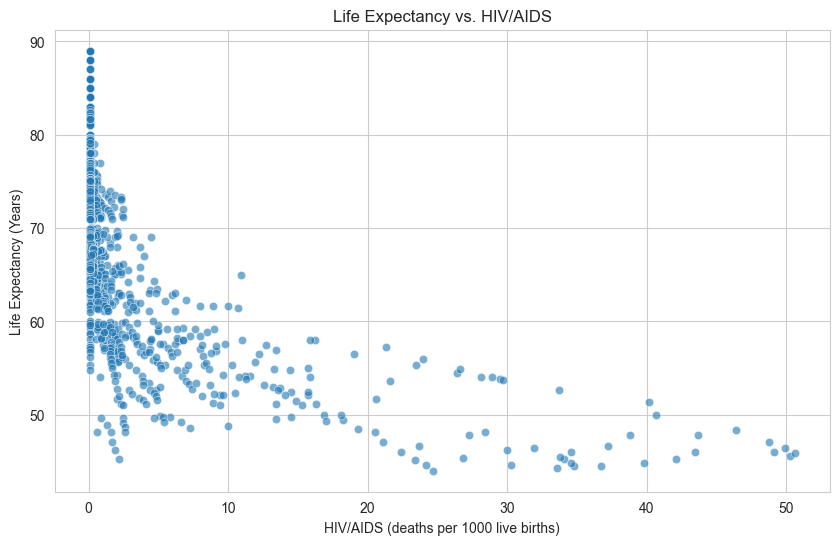

In [42]:
# Life Expectancy vs. HIV/AIDS
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HIV/AIDS', y='Life_expectancy', alpha=0.6)
plt.title('Life Expectancy vs. HIV/AIDS')
plt.xlabel('HIV/AIDS (deaths per 1000 live births)')
plt.ylabel('Life Expectancy (Years)')
plt.savefig('life_expectancy_vs_hiv_aids.png')
plt.show()



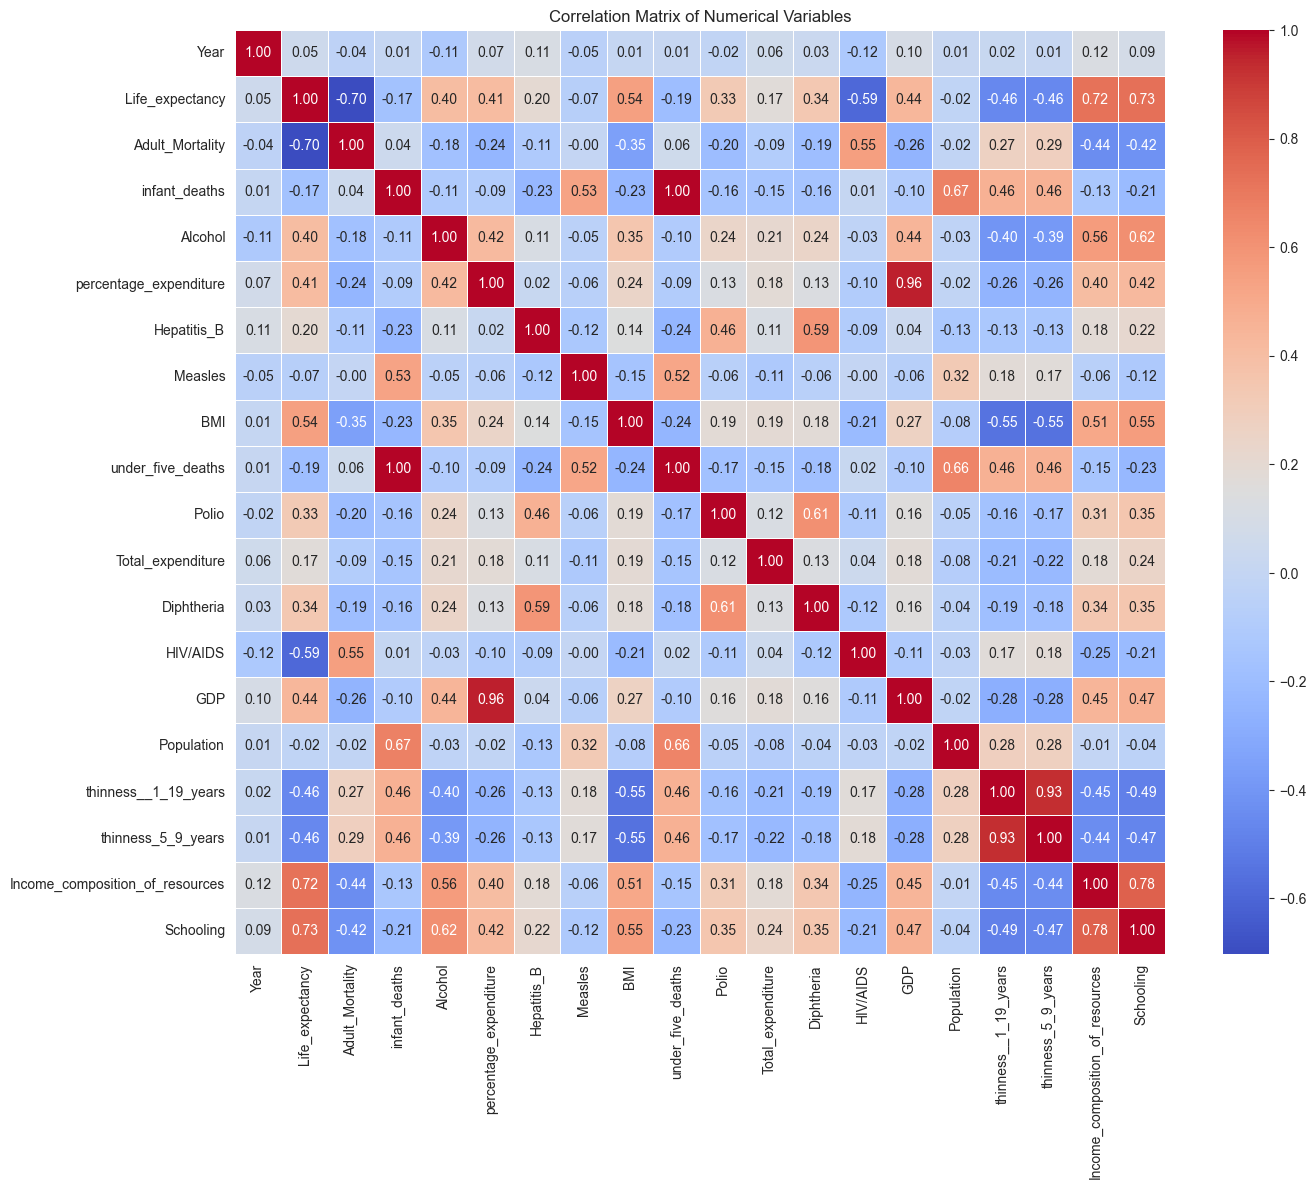

In [43]:
# Correlation Matrix
plt.figure(figsize=(15, 12))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.savefig('correlation_matrix.png')
plt.show()